# Part II - Effect of Loan features on Loan Amount
## by Lawal Rasheed

## Investigation Overview. 

This investigation is interested in figuring out what determines the maximum Loan Amount to be given out to a borrower, with its main focus being Monthly Loan Payment, Prosper Score, Stated Monthly Income, Debt to Income Ratio and Loan Term.



## Dataset Overview

The data consists of approximately 114,000 rows of loan data with 20 variables, with a subset of the data gotten. The variables includes Monthly Loan Payment, Prosper Score, Stated Monthly Income, Debt to Income Ratio, Loan Term, to mention but a few. Also wrangling of the data was carried out to effect data quality and tidiness of the dataframe, which included removing some data points due to missing values and inconsistencies.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loandata_clean = pd.read_csv('C:/Users/Rasheed Lawal/Downloads/project-template/Project Template/ProsperLoanData.csv')

In [3]:
# Using IQR method to detect outliers
Q1 = loandata_clean['StatedMonthlyIncome'].quantile(0.25)
Q3 = loandata_clean['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5*IQR  # data which falls below this is an outlier
UpperLimit = Q3 + 1.5*IQR  # data which falls above this is an outlier
print(LowerLimit, UpperLimit)

-1918.0 12618.0


In [4]:
# Removing outliers(trimming)
loandata_clean = loandata_clean[loandata_clean['StatedMonthlyIncome'] < UpperLimit]

## Loan Amount Distribution

The Loan Amounts from the dataset were in rounded figures and in multiples of 5,000 dollars. Using a smaller bin size for its distribution, the distribution turned out to be trimodal with most of the Loan Amount given out at 4,000, 10,000 and 15,000 dollars.

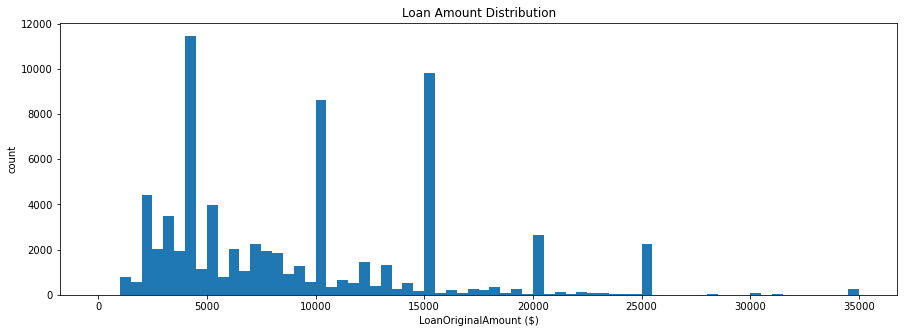

In [5]:
# Using a smaller bin size
binsize = 500
bins = np.arange(0, loandata_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = loandata_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Loan Amount Distribution');
plt.show()

## Stated Monthly Income Distribution

The Stated Monthly Income variable distribution was observed to have a long-tailed distribution with lots of people earning on the low Stated Monthly Income end. After trimming and removal of outliers, a 4,000 dollars peak was observed, noting the little peak also at 0 dollars representing people who are unemployed.

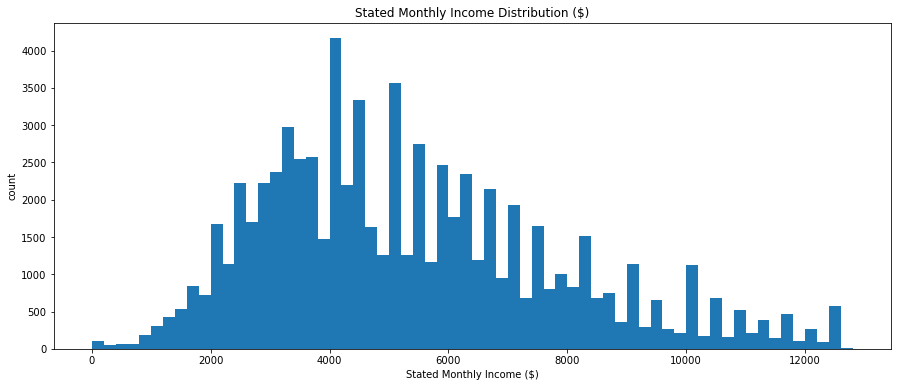

In [6]:
# Using a reduced bin size
binsize = 200
bins = np.arange(0, loandata_clean['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[15, 6])
plt.hist(data = loandata_clean, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Stated Monthly Income Distribution ($)');
plt.show()

## Loan Original Amount vs Monthly Loan Payment
There is observed to be a strong positive relationship that exist between Loan Amount and Monthly Loan Payment. Also, the plot shown was seen to be split into three lines indicating the presence of a categorical variable. 


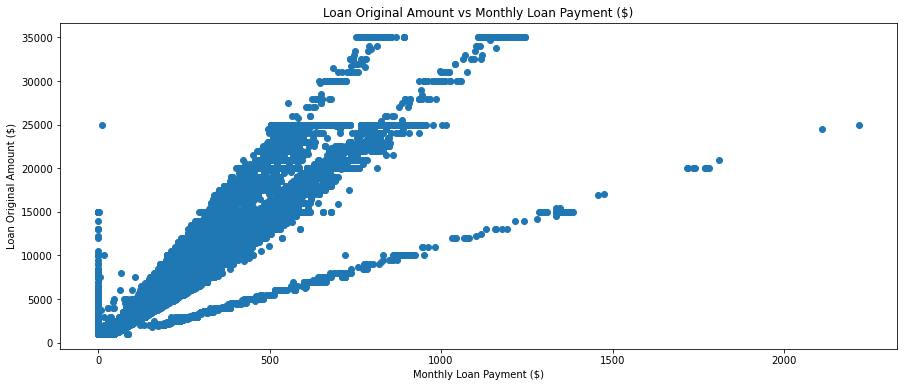

In [7]:
# Using a scatterplot to determine if there is a correlation between MonthlyLoanPayment and LoanOriginalAmount
plt.figure(figsize = [15, 6])
plt.scatter(data = loandata_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Original Amount ($)')
plt.title('Loan Original Amount vs Monthly Loan Payment ($)')
plt.show()

## Loan Amount Across Term and Monthly Loan Payment
From the visual, it can be seen that there is a third variable (Loan Term) involved, showing that borrowers with longer loan Term 36 and 60 months, receives higher loan amount than borrowers with loan Term 12 months.
Also, as shown in the visual, the scheduled monthly payment for a longer loan Term is less than that of small loan Term.

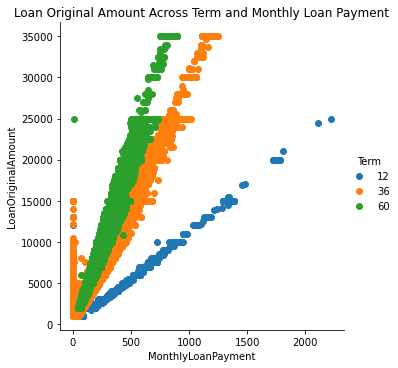

In [8]:
g = sb.FacetGrid(data = loandata_clean, hue = 'Term', height = 5)
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount')
plt.title('Loan Original Amount Across Term and Monthly Loan Payment')
g.add_legend();

## Loan Original Amount vs Prosper Score
It can be seen from the visual that the Loan Original Amount increases as the Prosper number increases(or Prosper risk reduces), showing that low risk borrowers have a higher chance of getting larger loan amount.

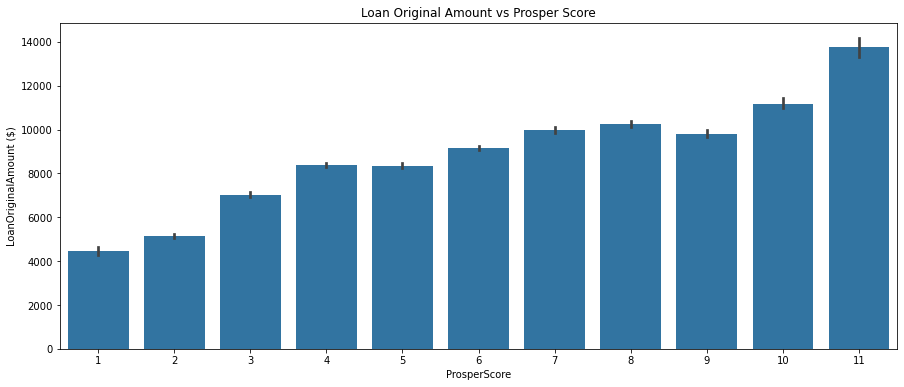

In [9]:
plt.figure(figsize=[15,6])
base_color = sb.color_palette()[0]
sb.barplot(data=loandata_clean, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Loan Original Amount vs Prosper Score');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt